# <div align="center"> Data Exploration 

#### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

#### Reading csv files

In [2]:
mercedes = pd.read_csv('../Clean_Data/mercedes_esp.csv')
audi = pd.read_csv('../Clean_Data/audi_esp.csv')
land_rover = pd.read_csv('../Clean_data/land_rover_esp.csv')
bmw = pd.read_csv('../Clean_Data/BMW_esp.csv')
porsche = pd.read_csv('../Clean_Data/porsche_esp.csv')

In [3]:
df = pd.concat([mercedes,audi,land_rover,bmw,porsche],axis = 0)
df=df.reset_index(drop=True)

#### DataFrame Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13094 entries, 0 to 13093
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Brand      13094 non-null  object
 1   Model      13094 non-null  object
 2   Year       13094 non-null  int64 
 3   Km         13094 non-null  int64 
 4   Power      13094 non-null  int64 
 5   Fuel_type  13094 non-null  object
 6   Price      13094 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 716.2+ KB


In [5]:
#Numerical Variables
df.groupby('Brand').describe()

Year                                                         \
                count         mean       std     min     25%     50%     75%   
Brand                                                                          
Audi           4047.0  2015.262417  2.757604  2010.0  2013.0  2016.0  2018.0   
BMW            3919.0  2015.202858  2.810672  2010.0  2013.0  2016.0  2018.0   
LandRover      1102.0  2015.637024  2.363592  2010.0  2014.0  2016.0  2017.0   
Mercedes-Benz  3247.0  2015.366184  2.727714  2010.0  2013.0  2016.0  2018.0   
Porsche         779.0  2014.498074  2.486660  2010.0  2012.0  2015.0  2016.0   

                           Km                                               \
                  max   count          mean           std     min      25%   
Brand                                                                        
Audi           2020.0  4047.0  87434.864838  61646.673767  5116.0  31000.0   
BMW            2020.0  3919.0  88046.682317  62150.649738  5006.0  30919.0   
LandRover      2020.0  1102.0  81682.458258  55834.220988  5213.0  38000.0   
Mercedes-Benz  2020.0  3247.0  80300.010471  59935.353899  5013.0  28003.0   
Porsche        2020.0   779.0  91519.378691  57571.177406  5792.0  45000.0   

                                              Power                         \
                   50%        75%       max   count        mean        std   
Brand                                                                        
Audi           79000.0  129277.50  384000.0  4047.0  182.105016  76.104441   
BMW            80905.0  130000.00  365000.0  3919.0  187.948201  61.481274   
LandRover      75000.0  114870.75  360000.0  1102.0  214.837568  74.702911   
Mercedes-Benz  70000.0  116000.00  383000.0  3247.0  179.485987  66.170487   
Porsche        83000.0  127889.00  349000.0   779.0  325.269576  80.611842   

                                                   Price                \
                 min    25%    50%    75%    max   count          mean   
Brand                                                                    
Audi            86.0  140.0  150.0  204.0  605.0  4047.0  24019.736101   
BMW             75.0  143.0  184.0  211.5  555.0  3919.0  23366.732075   
LandRover      110.0  150.0  190.0  258.0  575.0  1102.0  35199.401996   
Mercedes-Benz   75.0  136.0  170.0  204.0  517.0  3247.0  26539.899600   
Porsche        239.0  258.0  299.0  400.0  570.0   779.0  50878.618742   

                                                                          
                        std      min      25%      50%      75%      max  
Brand                                                                     
Audi           13021.684561   3300.0  15900.0  20950.0  27500.0  89900.0  
BMW            10189.861956   4900.0  15990.0  20990.0  29000.0  69999.0  
LandRover      16035.210401  10999.0  23492.5  28500.0  44900.0  89990.0  
Mercedes-Benz  12817.155515   4800.0  18000.0  23990.0  30950.0  89000.0  
Porsche        17426.321472  14500.0  37900.0  47990.0  59900.0  99900.0

#### Preparing data for plotting

In [6]:
#Tidy data
df_med = pd.DataFrame(df.groupby('Year')['Price'].median())
df_audi=df[df['Brand']=='Audi'].groupby('Year').median()
df_audi['Brand']='Audi'
df_bmw=df[df['Brand']=='BMW'].groupby('Year').median()
df_bmw['Brand']='BMW'
df_mer=df[df['Brand']=='Mercedes-Benz'].groupby('Year').median()
df_mer['Brand']='Mercedes'
df_lr=df[df['Brand']=='LandRover'].groupby('Year').median()
df_lr['Brand']='LandRover'
df_por=df[df['Brand']=='Porsche'].groupby('Year').median()
df_por['Brand']='Porsche'
df_plot = pd.concat([df_audi,df_bmw,df_mer,df_lr,df_por],axis = 0)
df_plot['Years']=df_plot.index
df['Km_group']=pd.cut(df['Km'],bins=[0,30000,60000,90000,120000,150000,180000,210000,240000,270000,300000,400000])
df['Km_group']=df['Km_group'].astype(str)
df['Km_']=(df['Km_group'].str.split().str[0].str.replace('(','').str.replace(',','').astype(int) +
     df['Km_group'].str.split().str[1].str.replace(']','').str.replace(',','').astype(int))/2
df['Power_group']=pd.cut(df['Power'],bins=[0,120,180,240,300,360,420,480,540,600,800])
df['Power_group']=df['Power_group'].astype(str)
df['Power_']=(df['Power_group'].str.split().str[0].str.replace('(','').str.replace(',','').str.split('.').str[0].astype(int) +
     df['Power_group'].str.split().str[1].str.replace(']','').str.replace(',','').str.split('.').str[0].astype(int))/2

#### Prices

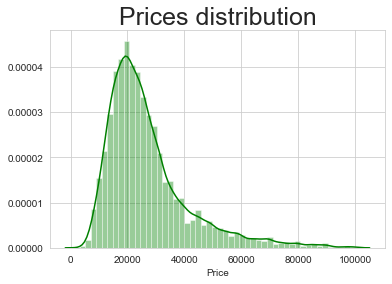

In [7]:
sns.set_style("whitegrid")
price_dist = sns.distplot(df['Price'],color='Green',bins=50).set_title('Prices distribution',fontsize=25)

#### Prices by car brand

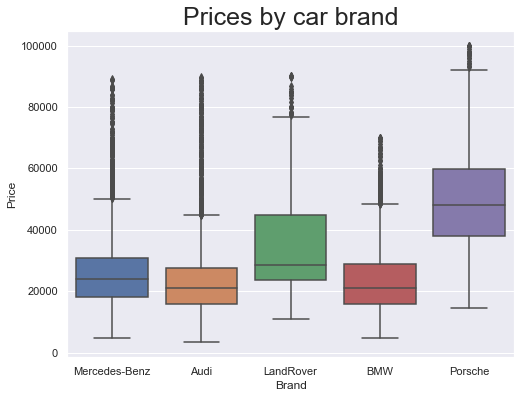

In [8]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(8,6)}) 
prices_by_brand=sns.boxplot(x=df['Brand'],y=df['Price']).set_title('Prices by car brand',fontsize=25)

#### BMW prices by model

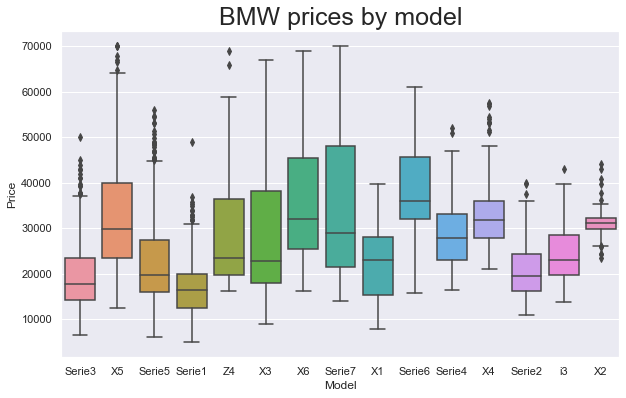

In [9]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)}) 
prices_by_brand=sns.boxplot(x=df[df['Brand']=='BMW']['Model'],y=df['Price']).set_title('BMW prices by model',fontsize=25)

#### Prices by Fuel_type

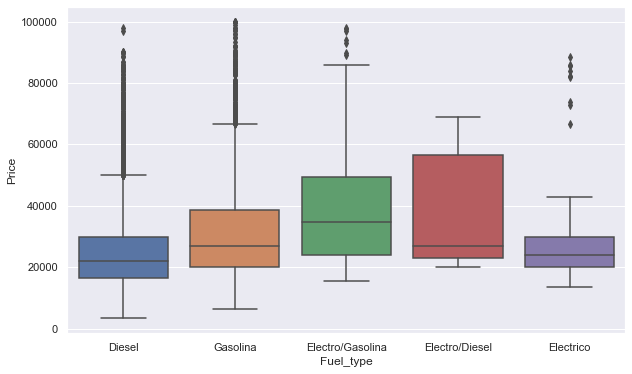

In [10]:
prices_by_brand=sns.boxplot(x=df['Fuel_type'],y=df['Price'])

#### Price evolution over time

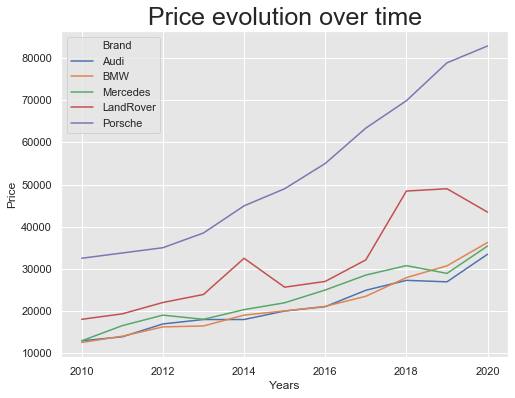

In [11]:
sns.set(rc={'figure.figsize':(8,6)}) 
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
ax = sns.lineplot(x='Years',y='Price',data=df_plot,hue='Brand',markers=True).set_title('Price evolution over time',fontsize=25)

#### Price evolution over Km

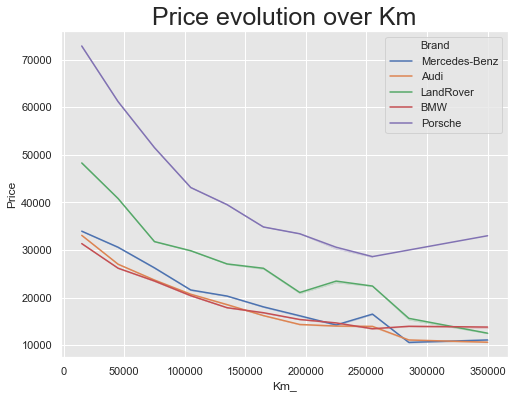

In [12]:
sns.set(rc={'figure.figsize':(8,6)}) 
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
ax = sns.lineplot(x='Km_',y='Price',data=df,hue='Brand',ci=False,markers=True).set_title('Price evolution over Km',fontsize=25)

#### Price evolution over Power

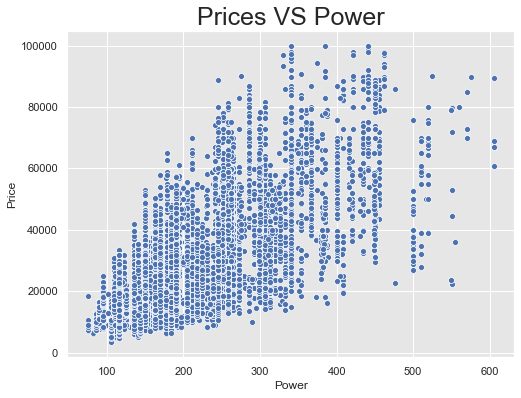

In [13]:
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
ax = sns.scatterplot(x=df['Power'],y=df['Price']).set_title('Prices VS Power',fontsize=25)

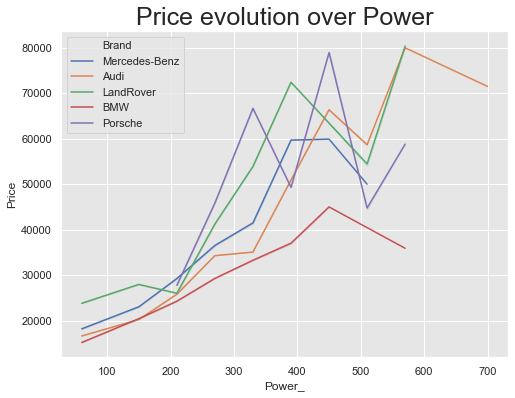

In [14]:
sns.set(rc={'figure.figsize':(8,6)}) 
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
ax = sns.lineplot(x='Power_',y='Price',data=df,hue='Brand',ci=False,markers=True).set_title('Price evolution over Power',fontsize=25)

#### Kilometers evolution over Years

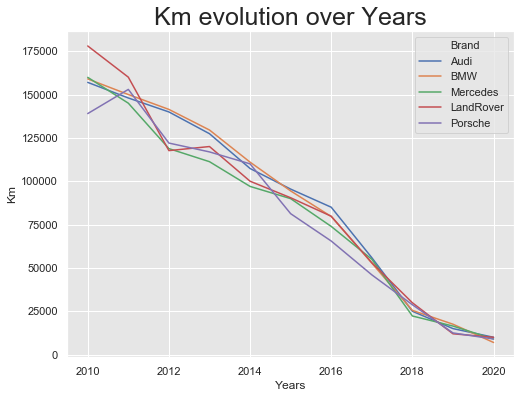

In [15]:
sns.set(rc={'figure.figsize':(8,6)}) 
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
ax = sns.lineplot(x='Years',y='Km',data=df_plot,hue='Brand',markers=True).set_title('Km evolution over Years',fontsize=25)

#### Correlation between numerical variables

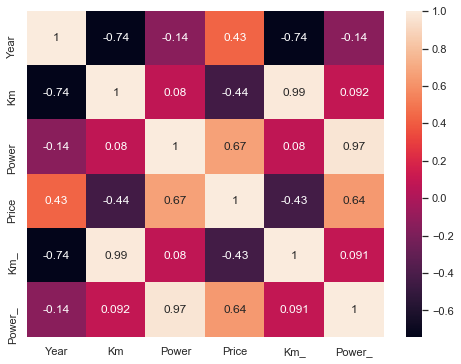

In [16]:
# In this correlation Matrix map we see that the numerical features are not strongly correlated with the target, the price.
# This correlation will change if we only look al one specific model.
CorrMatrix = df.corr()
sns.heatmap(CorrMatrix, annot=True)
plt.show()

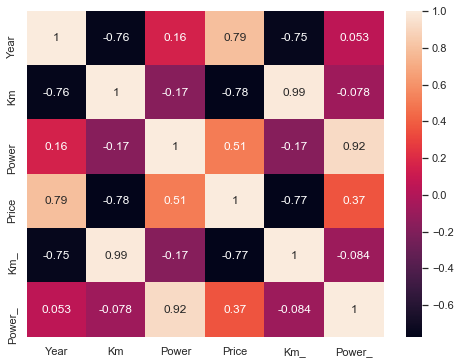

In [17]:
# Audi A3 correlation Matrix
#Looking at the Audi A3 correlation Matrix we see that the year and the km are strongly correlated with the target.
CorrMatrix_A3 = df[df['Model']=='A3'].corr()
sns.heatmap(CorrMatrix_A3, annot=True)
plt.show()